# Trying out different iteration methods a noise free environment

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize

import seaborn as sns
import plotly.express as px

import numpy as np
import pandas as pd
import polars as pl

import statsmodels.formula.api as smf
import statsmodels.api as sm


In [101]:
%run example_codes.py

<Figure size 640x480 with 0 Axes>

### Reverse KL divergence

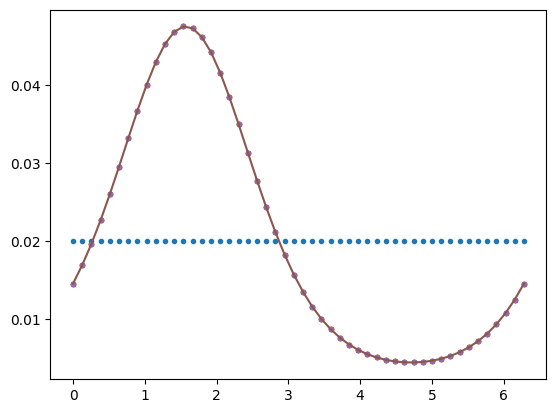

In [109]:
xs = np.linspace(0, 2*np.pi, 50)
Cs = np.sin(xs)

ps = np.ones(50) / 50

for i in range(5):
    plt.plot(xs, ps, '.')
    ps, LM = min_kl_cvxpy(ps, Cs, 0.5, direction='reverse', return_lagrange=True)

    if i == 0:
        lagrange = LM

gt = np.exp(-lagrange[1]*Cs)
gt = gt / gt.sum()
plt.plot(xs, gt)

Excellent: this works exactly as we would expect. In this case, the problem is equivalent to entropy minimization, so it should work like this for reasons besides my own solutions.

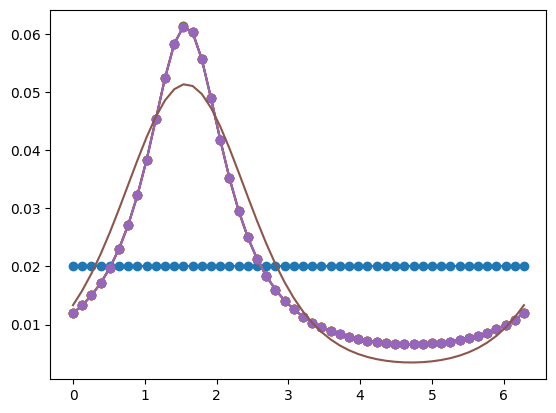

In [113]:
xs = np.linspace(0, 2*np.pi, 50)
Cs = np.sin(xs)

ps = np.ones(50) / 50

for i in range(5):
    plt.plot(xs, ps, '-o')
    ps, LM = min_kl_cvxpy(ps, Cs, 0.5, direction='forward', return_lagrange=True)

    if i == 0:
        lagrange = LM

gt = np.exp(-lagrange[1]*Cs)
gt = gt / gt.sum()
plt.plot(xs, gt)

This one looks different. It again converges after only one iteration, but the resulting distribution is not the same as the theoretical result.

What's more, it seems that the outputs _should_ alway converge after exactly one step: any output that satisfies the constraints will be as close to itself as possible, under any $f$ divergence.

I must be missing something important about my previous solutions...

#### I think I've figured it out

The missing factor is the change of variables between $s$ and $\theta$. This $f$-divergence minimization gives the distribution in units of $s$, but we really want the distribution in terms of $\theta$. Moreover, the constraint is a function of $\theta$, so the change of variables should also take that into account.

I don't think this works a a short-cut to our previous results.